In [1]:
import pandas as pd

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv("SP500.csv")

# Drop rows with null values
df.dropna(inplace=True)

# Display the DataFrame after dropping null rows
print(df)

            DATE    SP500
0     2010-06-28  1074.57
1     2010-06-29  1041.24
2     2010-06-30  1030.71
3     2010-07-01  1027.37
4     2010-07-02  1022.58
...          ...      ...
2605  2020-06-22  3117.86
2606  2020-06-23  3131.29
2607  2020-06-24  3050.33
2608  2020-06-25  3083.76
2609  2020-06-26  3009.05

[2610 rows x 2 columns]


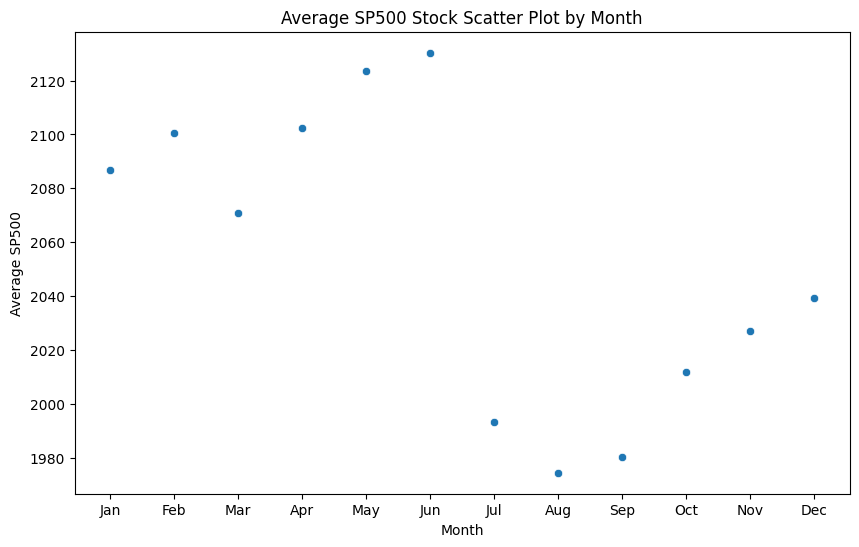

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Extract the month from the date
df['Month'] = df['DATE'].dt.month

# Convert 'SP500' to numeric
df['SP500'] = pd.to_numeric(df['SP500'], errors='coerce')

# Calculate the average SP500 value for each month
monthly_avg = df.groupby('Month')['SP500'].mean().reset_index()

# Plot the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=monthly_avg, x='Month', y='SP500')
plt.title('Average SP500 Stock Scatter Plot by Month')
plt.xlabel('Month')
plt.ylabel('Average SP500')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

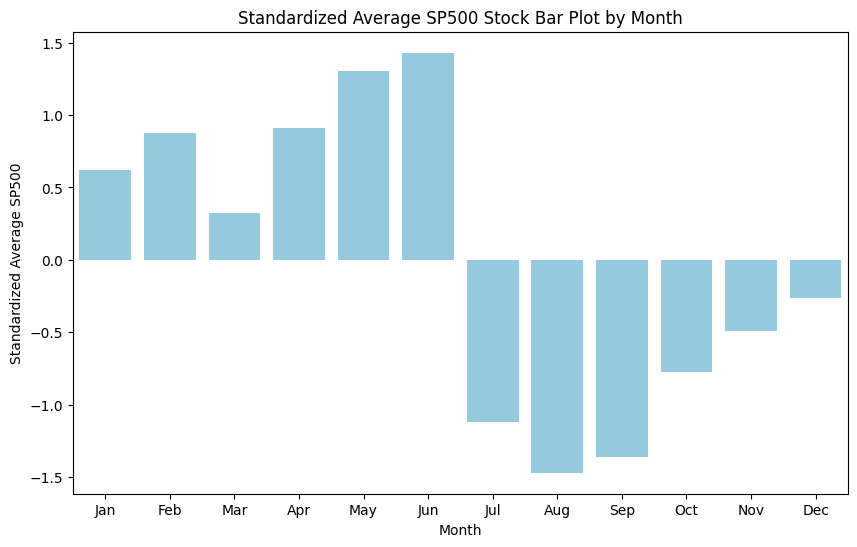

In [10]:
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("SP500.csv")

# Drop rows with null values
df.dropna(inplace=True)

# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Extract the month from the date
df['Month'] = df['DATE'].dt.month

# Convert 'SP500' to numeric
df['SP500'] = pd.to_numeric(df['SP500'], errors='coerce')

# Calculate the average SP500 value for each month
monthly_avg = df.groupby('Month')['SP500'].mean().reset_index()

# Standardize the SP500 values
scaler = StandardScaler()
monthly_avg['SP500_standardized'] = scaler.fit_transform(monthly_avg[['SP500']])

# Plot the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_avg, x='Month', y='SP500_standardized', color='skyblue')
plt.title('Standardized Average SP500 Stock Bar Plot by Month')
plt.xlabel('Month')
plt.ylabel('Standardized Average SP500')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv("SP500.csv")

# Drop rows with null values
df.dropna(inplace=True)

# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Set 'DATE' column as index
df.set_index('DATE', inplace=True)

# Convert 'SP500' to numeric
df['SP500'] = pd.to_numeric(df['SP500'], errors='coerce')

# Splitting data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Define and fit SARIMA model
model = SARIMAX(train['SP500'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit(disp=False)

# Forecast
forecast = result.forecast(steps=len(test))

# Check for NaN values in test set and forecast
if test['SP500'].isnull().any() or forecast.isnull().any():
    print("NaN values found in test set or forecast. Please handle NaN values.")
else:
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test['SP500'], forecast))

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train['SP500'], label='Train')
    plt.plot(test.index, test['SP500'], label='Test')
    plt.plot(test.index, forecast, label='Forecast')
    plt.title(f'SARIMA Forecast (RMSE: {rmse:.2f})')
    plt.xlabel('Date')
    plt.ylabel('SP500')
    plt.legend()
    plt.show()

D:\Projects\DataMiningProject\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\Projects\DataMiningProject\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


NaN values found in test set or forecast. Please handle NaN values.


In [22]:
# Check for NaN values in the test set
nan_test = test[test['SP500'].isnull()]

# Check for NaN values in the forecast
nan_forecast = forecast[forecast.isnull()]

# Print rows containing NaN values in the test set
print("NaN values in test set:")
print(nan_test)

# Print rows containing NaN values in the forecast
print("\nNaN values in forecast:")
print(nan_forecast)

NaN values in test set:
            SP500
DATE             
2018-07-04    NaN
2018-09-03    NaN
2018-11-22    NaN
2018-12-05    NaN
2018-12-25    NaN
2019-01-01    NaN
2019-01-21    NaN
2019-02-18    NaN
2019-04-19    NaN
2019-05-27    NaN
2019-07-04    NaN
2019-09-02    NaN
2019-11-28    NaN
2019-12-25    NaN
2020-01-01    NaN
2020-01-20    NaN
2020-02-17    NaN
2020-04-10    NaN
2020-05-25    NaN

NaN values in forecast:
Series([], Freq: B, Name: predicted_mean, dtype: float64)


C:\Users\ibzcl\AppData\Local\Temp\ipykernel_5460\1448240226.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['SP500'].interpolate(method='linear', inplace=True)
C:\Users\ibzcl\AppData\Local\Temp\ipykernel_5460\1448240226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['SP500'].interpolate(method='linear', inplace=True)


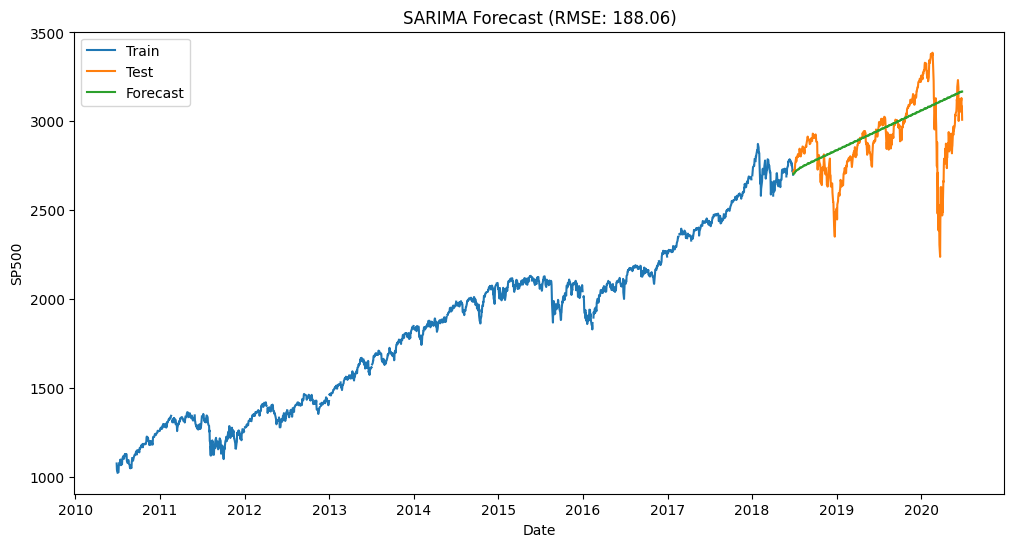

In [23]:
# Interpolate NaN values in the test set
test['SP500'].interpolate(method='linear', inplace=True)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['SP500'], forecast))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['SP500'], label='Train')
plt.plot(test.index, test['SP500'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.title(f'SARIMA Forecast (RMSE: {rmse:.2f})')
plt.xlabel('Date')
plt.ylabel('SP500')
plt.legend()
plt.show()

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

# Read the CSV file into a DataFrame
df = pd.read_csv("SP500.csv")

# Interpolate NaN values
df['SP500'] = pd.to_numeric(df['SP500'], errors='coerce').interpolate(method='linear')

# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Set 'DATE' column as index
df.set_index('DATE', inplace=True)

# Standardize the SP500 values
scaler = StandardScaler()
df['SP500_standardized'] = scaler.fit_transform(df[['SP500']])

# Normalize the standardized SP500 values
scaler = MinMaxScaler()
df['SP500_normalized'] = scaler.fit_transform(df[['SP500_standardized']])

# Define and fit SARIMA model to the entire dataset
model = SARIMAX(df['SP500_normalized'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit(disp=False, maxiter=1000)  # Increase max iterations to 1000


# Forecast future values
forecast_steps = 50 # Forecast for the next 12 months
forecast = result.forecast(steps=forecast_steps)

# Inverse transform the forecasted values to get the original scale
forecast_original_scale = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

# Adjust SARIMA model parameters and increase max iterations
model = SARIMAX(df['SP500_normalized'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit(disp=False, maxiter=1000)

# Generate forecast
forecast = result.forecast(steps=forecast_steps)

# Evaluate the forecast and inspect the results
print(forecast)

D:\Projects\DataMiningProject\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\Projects\DataMiningProject\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\Projects\DataMiningProject\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\Projects\DataMiningProject\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


2020-06-29    0.846576
2020-06-30    0.845618
2020-07-01    0.846333
2020-07-02    0.848777
2020-07-03    0.849011
2020-07-06    0.851433
2020-07-07    0.850877
2020-07-08    0.847466
2020-07-09    0.851396
2020-07-10    0.846570
2020-07-13    0.848252
2020-07-14    0.846819
2020-07-15    0.848352
2020-07-16    0.849481
2020-07-17    0.849077
2020-07-20    0.851495
2020-07-21    0.851673
2020-07-22    0.854181
2020-07-23    0.853726
2020-07-24    0.850111
2020-07-27    0.854006
2020-07-28    0.849706
2020-07-29    0.851166
2020-07-30    0.850270
2020-07-31    0.851722
2020-08-03    0.852888
2020-08-04    0.852464
2020-08-05    0.854881
2020-08-06    0.855058
2020-08-07    0.857568
2020-08-10    0.857115
2020-08-11    0.853496
2020-08-12    0.857390
2020-08-13    0.853100
2020-08-14    0.854556
2020-08-17    0.853670
2020-08-18    0.855120
2020-08-19    0.856287
2020-08-20    0.855862
2020-08-21    0.858280
2020-08-24    0.858457
2020-08-25    0.860966
2020-08-26    0.860514
2020-08-27 